In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

dataiter = iter(data_loader)
images, labels = next(dataiter)

print(torch.min(images), torch.max(images))
#This is for choosing the Appropraite Activation function

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-5)

#Traning
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for images, _ in data_loader:
        recon = model(images)
        loss = criterion(recon, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
    outputs.append((epoch, images, recon))

tensor(0.) tensor(1.)
Epoch 1/10, Loss: 0.0092
Epoch 2/10, Loss: 0.0059
Epoch 3/10, Loss: 0.0047
Epoch 4/10, Loss: 0.0044
Epoch 5/10, Loss: 0.0046
Epoch 6/10, Loss: 0.0036
Epoch 7/10, Loss: 0.0035
Epoch 8/10, Loss: 0.0038
Epoch 9/10, Loss: 0.0037
Epoch 10/10, Loss: 0.0040


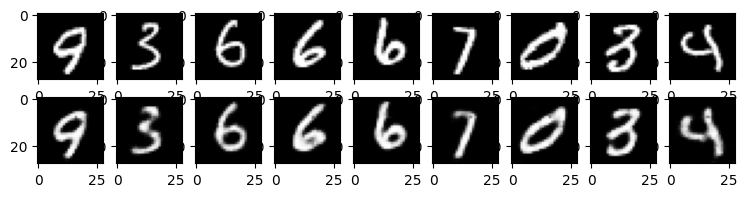

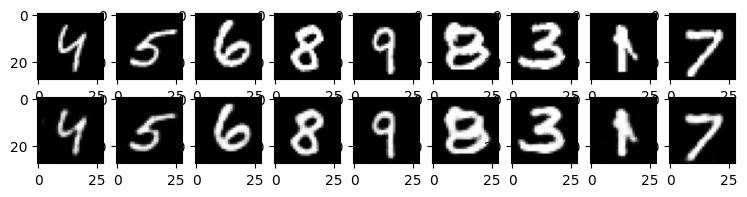

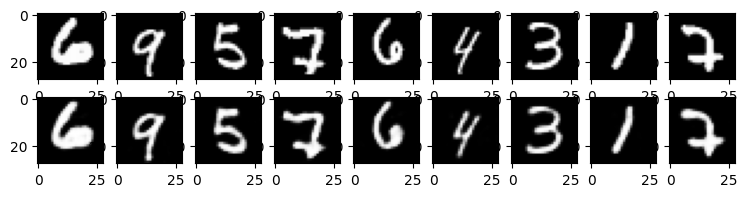

In [3]:
#Plotting of Images
#Using CNN in the Model
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    images = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()

    for i, item in enumerate(images):
        if i >=9 : break
        plt.subplot(2, 9, i+1)
        plt.imshow(item.squeeze(0))

    for i, item in enumerate(recon):
        if i >=9 : break
        plt.subplot(2, 9, i+10)
        plt.imshow(item.squeeze(0))

    plt.show()